#Credit card Approval

##Overview

**Introduction**
This Final project aims to develop a machine learning modle capable of predicting whether credit card Accepted or not.

# EDA

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Data**

**1. Application Record**

In [4]:
#load Data
df1=pd.read_csv('/content/drive/MyDrive/Dibimbing_FinPro El/application_record.csv')
df1.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


**Keterangan Data**
1. ID	: Client number
2. CODE_GENDER	: Gender
3. FLAG_OWN_CAR	: Is there a car
4.FLAG_OWN_REALTY : 	Is there a property
5. CNT_CHILDREN	: Number of children
6. AMT_INCOME_TOTAL	: Annual income
7. NAME_INCOME_TYPE	: Income category
8. NAME_EDUCATION_TYPE	: Education level
9. NAME_FAMILY_STATUS	: Marital status
10. NAME_HOUSING_TYPE	: Way of living
11. DAYS_BIRTH	: Birthday	Count backwards from current day (0), -1 means yesterday
12. DAYS_EMPLOYED	: Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
13. FLAG_MOBIL	: Is there a mobile phone
14. FLAG_WORK_PHONE	: Is there a work phone
15. FLAG_PHONE	: Is there a phone
16. FLAG_EMAIL	: Is there an email
17. OCCUPATION_TYPE	: Occupation
18. CNT_FAM_MEMBERS	: Family size

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
df1.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

keterangan :
1. Data terdiri dari 18 Kolom
2. Data terdiri dari data numeric dan data categoricals
3. masih terdapat null value pada kolom dan data duplikat pada row
4. Pada colloum occupation_type terdapat null value sebanyak 134193. null value pada kolom ini bukan keputusna yang bijak karena akan banyak data yang akan hilang. Namun mengremove kolom juga bukan keputusan yang bijak karena kolom ini akan memepengaruhi analisis

In [7]:
#mencek apakah ada duplikat untuk kolom ID
df1['ID'].duplicated().sum()

47

duplikat id ini garus dihindari, karena untuk ID adalah key value untuk proses selanjutnya dan ini harsu uniq

In [8]:
#remove dupliket ID
df1 = df1.drop_duplicates(subset='ID', keep ='first')

In [9]:
#mengubah nullvalue pada kolom Occupation_type menjadi 'not_specific' alih alih mengapus kolom tersebut
df1['OCCUPATION_TYPE'].fillna('not_specific', inplace = True)

<ipython-input-9-554bf8e115ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OCCUPATION_TYPE'].fillna('not_specific', inplace = True)


In [10]:
#mengecek Kolom oocupatio_type
df1['OCCUPATION_TYPE'].value_counts(dropna = False)

not_specific             134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [11]:
df1.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

**DAYS_BIRTH dan DAYS_EMPLOYED**

Karena kolom data Days_birth dan Days_employed belum dalam satua tahun, maka perlu dikonversi terlebih dahulu, namun sebelumnya karena keterangan pada data 0 : adalah hari ini, dan -1 adalah yesterday, maka kita perlu untuk mengidentifikasi apakah pada kolom tersebut ada anomali atau yang nilai nya > 0

In [12]:
#mengecek anomali pada data Days_Birth
df1['DAYS_BIRTH'].max()

-7489

In [13]:
#mengecek anomali pada data Days_Birth
df1['DAYS_EMPLOYED'].max()

365243

In [14]:
#mengecek jumah data yang anomali pada DAYS_EMPLOYED
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

365243    75324
Name: DAYS_EMPLOYED, dtype: int64

terdapat keanehan pada 75324 data, decicision yang diambil pada kolom ini adalah mengubah data yang benilai > 0 pada kolom tersebut menjadi nol

In [15]:
#mengubah cell yang >0  menjadi 0
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [16]:
#cek ulang
df1['DAYS_EMPLOYED'].max()

0

data sudah diubah

**mengubah kolom DAYS-BIRTH and DAYS_EMPLOYED menjadi satuan tahun**

In [17]:
#mengubah kolom
df1['AGE'] = np.around(abs(df1['DAYS_BIRTH']) / 365, 1)
df1['YEARS_EMPLOYED'] = df1['DAYS_EMPLOYED'].apply(lambda x: np.around( abs(x) / 365 ,1) if x <= 0 else 0)




In [18]:
#CEK
df1['YEARS_EMPLOYED'].max()

48.0

In [19]:
#CEK
df1['AGE'].max()

69.0

data sudah diubah

In [20]:
#mengahpus kolom DAYS_BIRTH dan DAYS_EMPLOYED karena sudah ada kolom baru yaitu AGE dan YEARS_EMPLOYED
df1.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

**Mengecek kembali Data**

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  FLAG_MOBIL           438510 non-null  int64  
 11  FLAG_WORK_PHONE      438510 non-null  int64  
 12  FLAG_PHONE           438510 non-null  int64  
 13  FLAG_EMAIL           438510 non-null  int64  
 14  OCCUPATION_TYPE      438510 non-null  object 
 15  CNT_FAM_MEMBERS  

In [22]:
#cek null value
df1.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
YEARS_EMPLOYED         0
dtype: int64

sudah tidak ada null value

In [23]:
#check duplicated
df1.duplicated().sum()

0

**2. Credit_Record**

In [24]:
#load Data
df2 = pd.read_csv('/content/drive/MyDrive/Dibimbing_FinPro El/credit_record.csv')
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


**Keterangan : **
1. Month_Balance : The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
2. STATUS
0: 1-29 days past due
1: 30-59 days past due
2: 60-89 days overdue
3: 90-119 days overdue
4: 120-149 days overdue
5: Overdue or bad debts, write-offs for more than 150 days
C: paid off that month
X: No loan for the month

In [25]:
#cek Duplicated
df2.duplicated().sum()

0

In [26]:
#melihat nilai pada kolom MONTH_BALANCE
df2['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [27]:
#melihat nilai pada kolom STATUS
df2['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

Selanjutnya kita harus menentugan kategori pada data credit record. Kategori ini akna dibuat berdasarkan kolom status, kategorinya adalah beresiko yang ditandai dengan nilai 1 dan  tidak beresiko ditandai dengan kolom tidak beresiko ditandai dengan nilai 0

In [28]:
#mengubah Kolom STATUS pada credit record menjadi kolom CATEGORY
df2['CATEGORY'] = df2['STATUS']

In [29]:
#Membuat nilai kolom pada kolom CATEGORY
df2['CATEGORY'].replace('X', 0, inplace=True)
df2['CATEGORY'].replace('C', 0, inplace=True)
df2['CATEGORY']=df2['CATEGORY'].astype(int)
df2.loc[df2['CATEGORY']>=1,'CATEGORY']=1

In [30]:
#mengecek dupikat pada ID
df2['ID'].duplicated().sum()

1002590

In [31]:
#mengeck jumlah nilai yang tidak unique
df2['ID'].nunique()

45985

In [32]:
#menhilangkan ID yang duplikasi dengan memperhatikan kolom CATEGORY, dimana kolom yang di[ertahankan adalah kolom yang memiliki nilai kategory yang paling tinggi yangtu 1 atau beresiko]
df2=pd.DataFrame(df2.groupby(['ID'])['CATEGORY'].agg("max")).reset_index()

In [33]:
#mengecek kembali dupikat pada ID
df2['ID'].duplicated().sum()

0

In [34]:
#melihat persebaran data pada kolom CATEGORY
df2['CATEGORY'].value_counts()

0    40635
1     5350
Name: CATEGORY, dtype: int64

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        45985 non-null  int64
 1   CATEGORY  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


**3. Menggabungkan Data Application Record dan Credit Records**

In [36]:
#menggabungkan Data
df = (df1.assign(count=df1.groupby('ID').cumcount())
             .merge(df2.assign(count=df2.groupby('ID').cumcount()),
                     on=['ID', 'count'], how='inner')
             .drop(columns='count'))

In [37]:
#mengecek tabel Baru
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  FLAG_MOBIL           36457 non-null  int64  
 11  FLAG_WORK_PHONE      36457 non-null  int64  
 12  FLAG_PHONE           36457 non-null  int64  
 13  FLAG_EMAIL           36457 non-null  int64  
 14  OCCUPATION_TYPE      36457 non-null  object 
 15  CNT_FAM_MEMBERS      36457 non-null 

In [38]:
#pengecekan duplicated value
df['ID'].duplicated().sum()

0

Duplikat value, dan null value sudah tidak terdapat pada seluruh kolom terrsebut.

**Data Understanding**

Statiscal Summary

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  FLAG_MOBIL           36457 non-null  int64  
 11  FLAG_WORK_PHONE      36457 non-null  int64  
 12  FLAG_PHONE           36457 non-null  int64  
 13  FLAG_EMAIL           36457 non-null  int64  
 14  OCCUPATION_TYPE      36457 non-null  object 
 15  CNT_FAM_MEMBERS      36457 non-null 

In [40]:
df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CATEGORY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specific,2.0,32.9,12.4,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specific,2.0,32.9,12.4,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58.8,3.1,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.4,8.4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.4,8.4,0


In [41]:
#melakukan grouping data berdasarkan tipe data
numericals = ['ID','CNT_CHILDREN','AGE','YEARS_EMPLOYED','AMT_INCOME_TOTAL','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','CATEGORY']

categoricals = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [42]:
#numeric statsitical summary
df[numericals].describe()

,ID,CNT_CHILDREN,AGE,YEARS_EMPLOYED,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CATEGORY
count,3.645700e+04,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,43.767916,6.027973,1.866857e+05,1.0,0.225526,0.294813,0.089722,2.198453,0.117700
std,4.187524e+04,0.742367,11.508464,6.484278,1.017892e+05,0.0,0.417934,0.455965,0.285787,0.911686,0.322257
min,5.008804e+06,0.000000,20.500000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.042028e+06,0.000000,34.100000,1.100000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.074614e+06,0.000000,42.600000,4.300000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115396e+06,1.000000,53.300000,8.600000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150487e+06,19.000000,68.900000,43.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


dari hasil summary stasitic data numericals data tidak ditemukan kejanggalan pada data

In [43]:
#categoricals statistical suummary
df[categoricals].describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
count,36457,36457,36457,36457,36457,36457
unique,2,2,5,5,5,6
top,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,22614,24506,18819,24777,25048,32548


In [44]:
#melihat persebaran data seluruh kolom
for col in df.columns:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column ID:
5008804    1
5096993    1
5096983    1
5096987    1
5096988    1
          ..
5050819    1
5050815    1
5050813    1
5050812    1
5150337    1
Name: ID, Length: 36457, dtype: int64
------------------------------


Value counts for column CODE_GENDER:
F    24430
M    12027
Name: CODE_GENDER, dtype: int64
------------------------------


Value counts for column FLAG_OWN_CAR:
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64
------------------------------


Value counts for column FLAG_OWN_REALTY:
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64
------------------------------


Value counts for column CNT_CHILDREN:
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64
------------------------------


Value counts for column AMT_INCOME_TOTAL:
135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
177750.0       1
594

Sari hasil distribusi data diatas, kita dapat memilih beberapa kolom yang tidak dibutuhkan dalam analisis selanjutnya, yaitu
1. Flag_Mobil karena seluruh customer mobile phone
2. Gender karena gender tidak mempengaruhi diterima atau tidaknya
3. FLAG_EMAIL karena penya aau tidaknya email  tidak mempengaruhi peroses pengajuan


In [45]:
#drop kolom
df3=df.drop(columns =['FLAG_MOBIL','CODE_GENDER', 'FLAG_EMAIL'])

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   FLAG_WORK_PHONE      36457 non-null  int64  
 10  FLAG_PHONE           36457 non-null  int64  
 11  OCCUPATION_TYPE      36457 non-null  object 
 12  CNT_FAM_MEMBERS      36457 non-null  float64
 13  AGE                  36457 non-null  float64
 14  YEARS_EMPLOYED       36457 non-null  float64
 15  CATEGORY             36457 non-null 

#Univariate Analysis

In [47]:
#melakukan grouping data berdasarkan tipe data
numericals = ['ID','CNT_CHILDREN','AGE','YEARS_EMPLOYED','AMT_INCOME_TOTAL','FLAG_WORK_PHONE','FLAG_PHONE','CNT_FAM_MEMBERS','CATEGORY']

categoricals = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_WORK_PHONE','OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

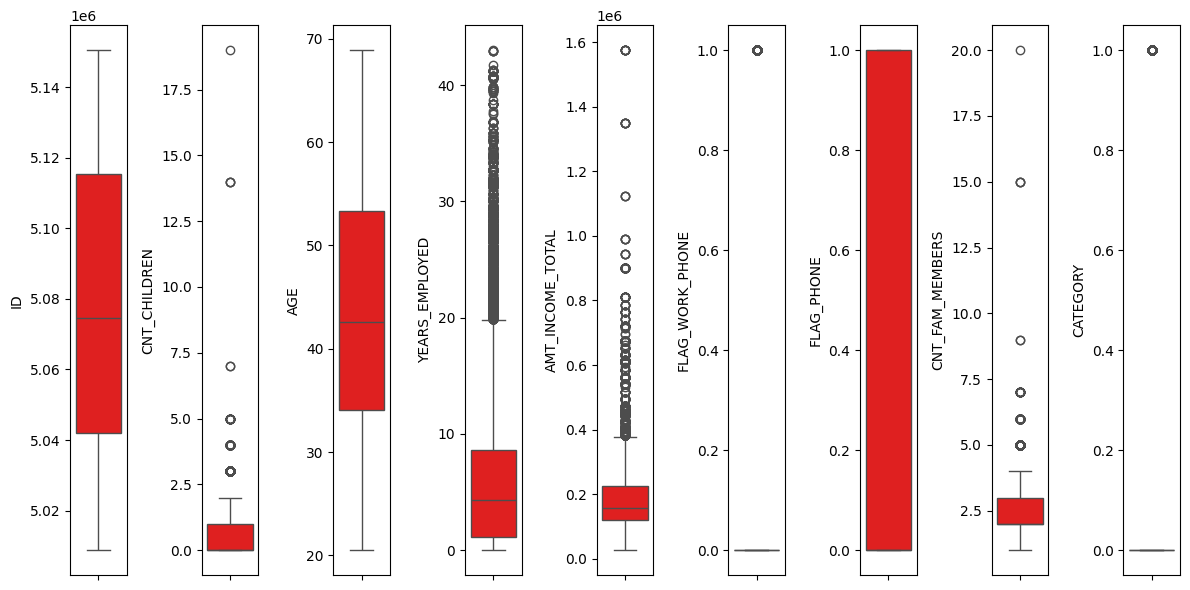

In [48]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

pada kolom Years_Employed dan AMT_INCOME_TOTAL terdapat outliers, hal itu wajar saja karena terdapat beberapa customer yang memiliki lama kerja jauh rata rata, dan begitupun dnegan penghasilan

**KDE Plot untuk melihat distribusi setiap Data**

In [49]:
background_color = '#00FFFF'
color_palette=['#9932CC', '#4B0082','#FF69B4','#C71585','#663399']

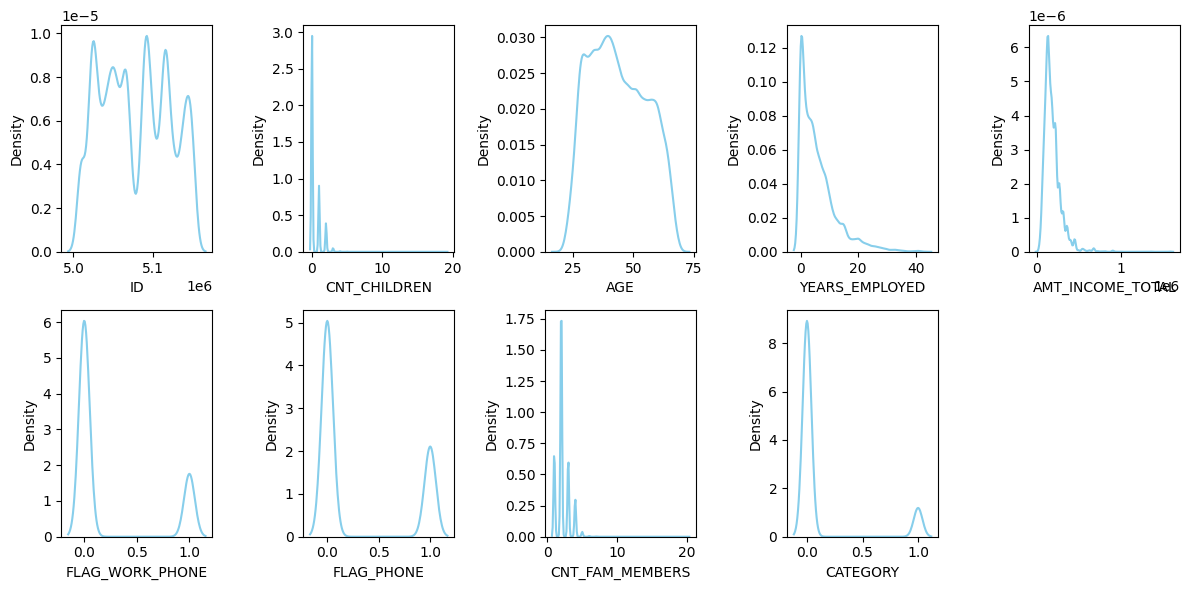

In [50]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df3[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [51]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=df3[feature], hue='CATEGORY' , data=df3)
        plt.legend(loc='best')
        total = len(df3[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

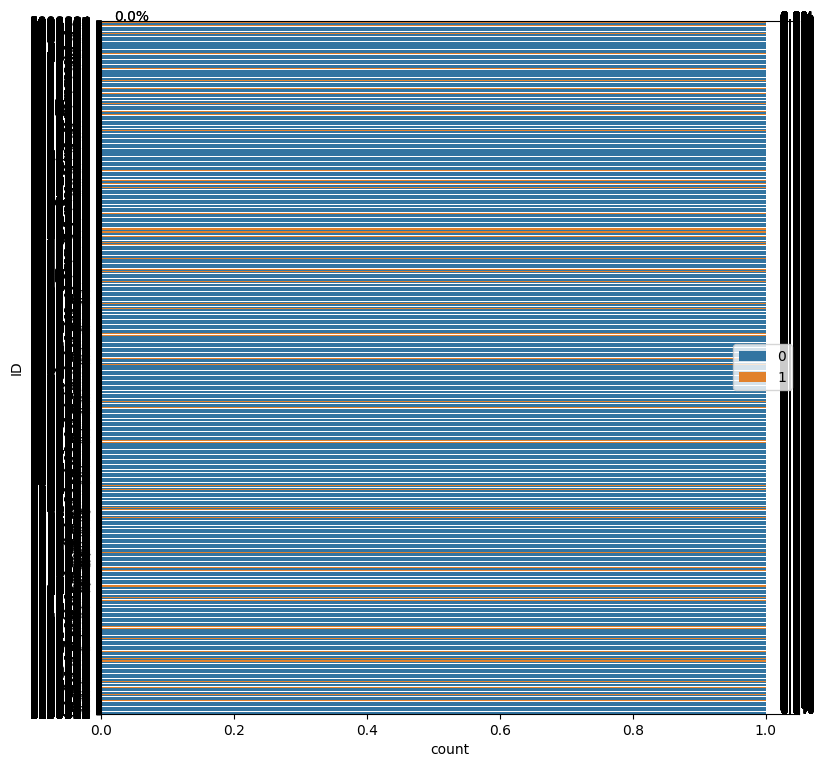

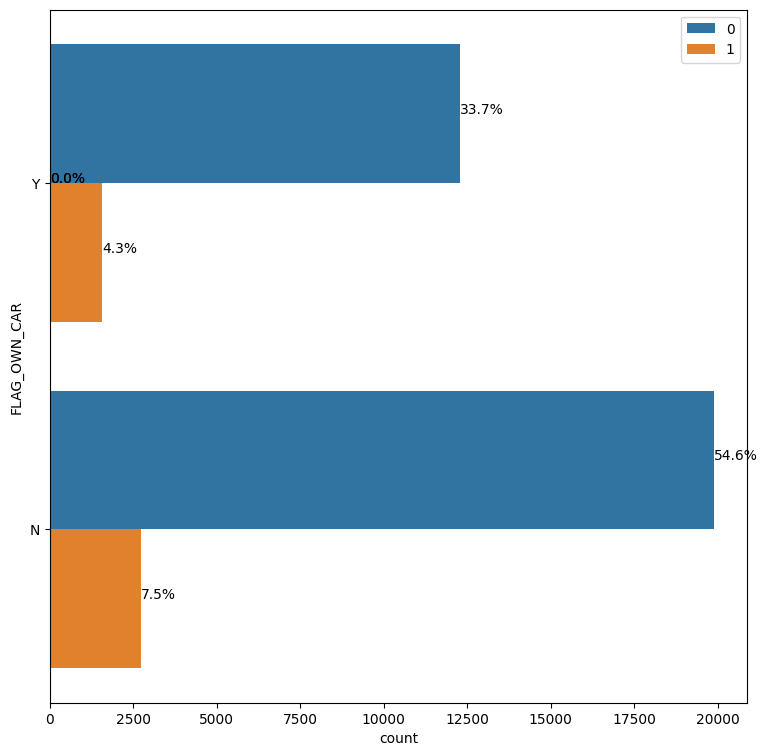

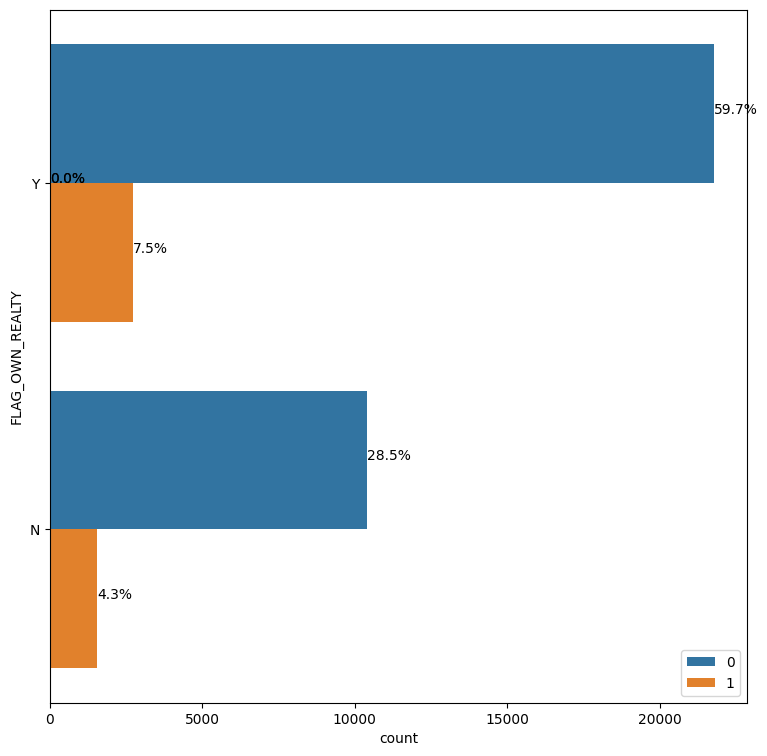

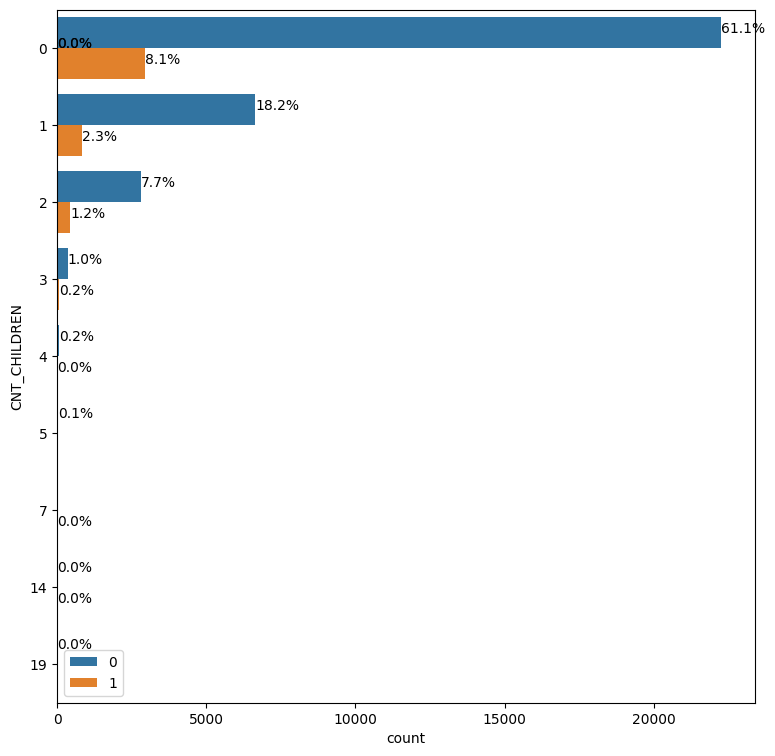

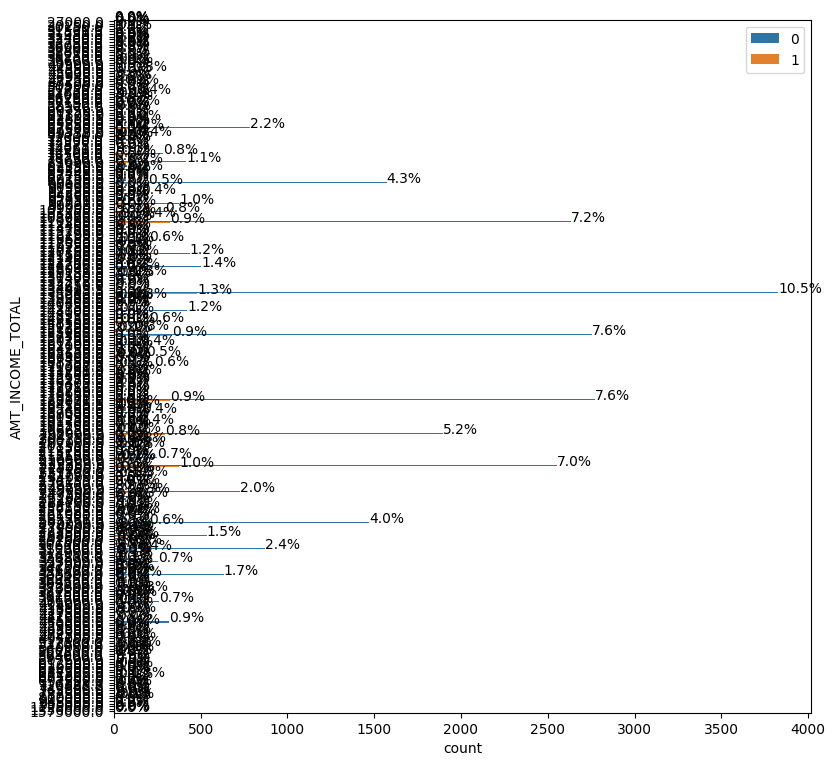

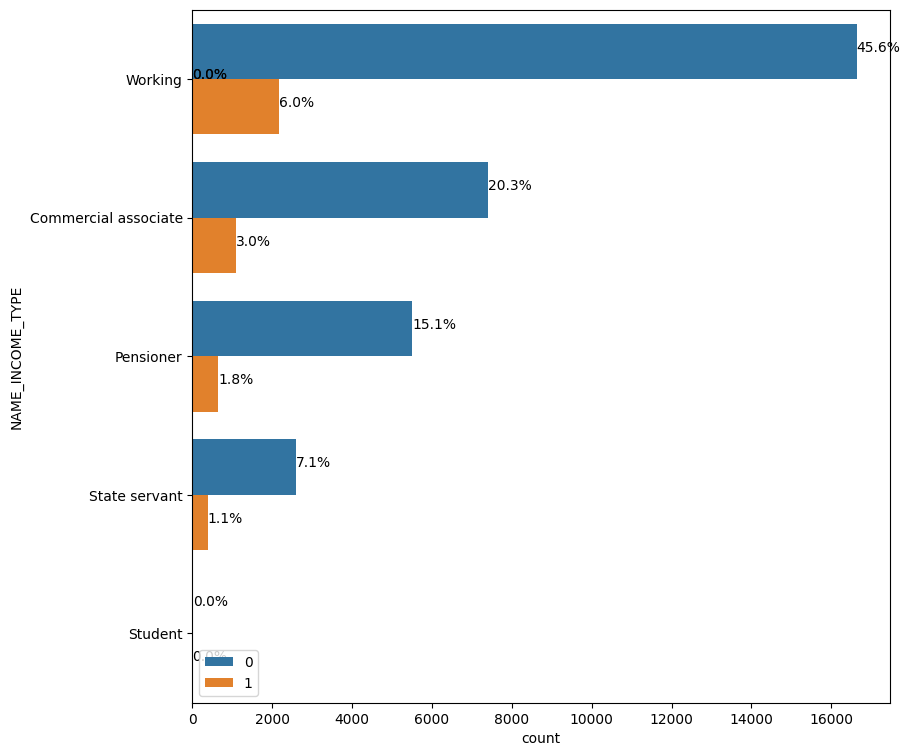

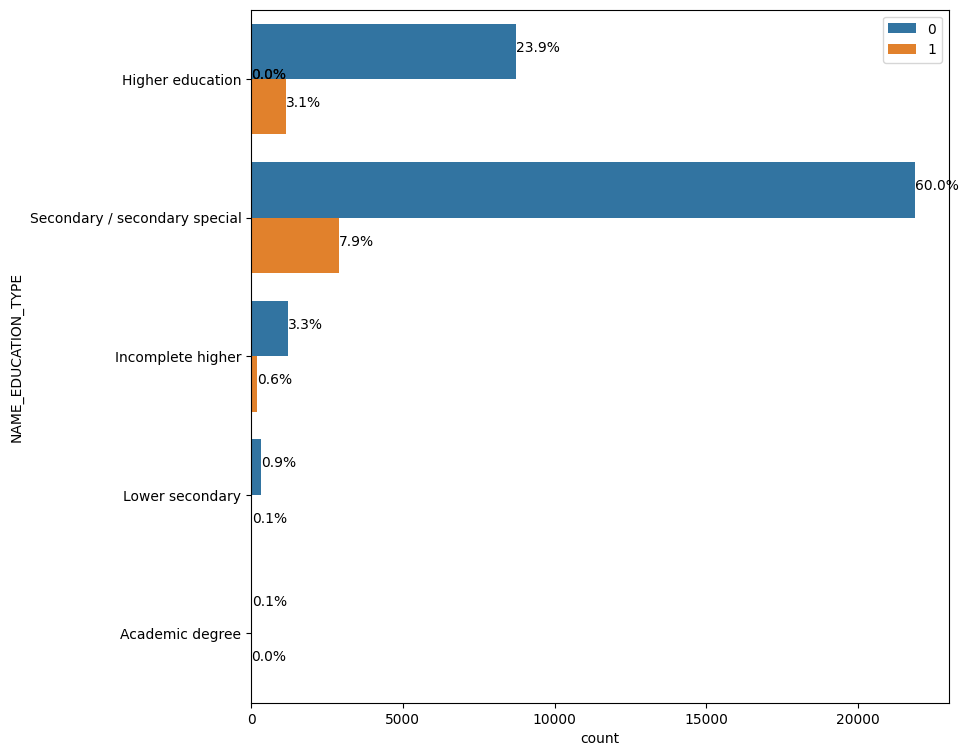

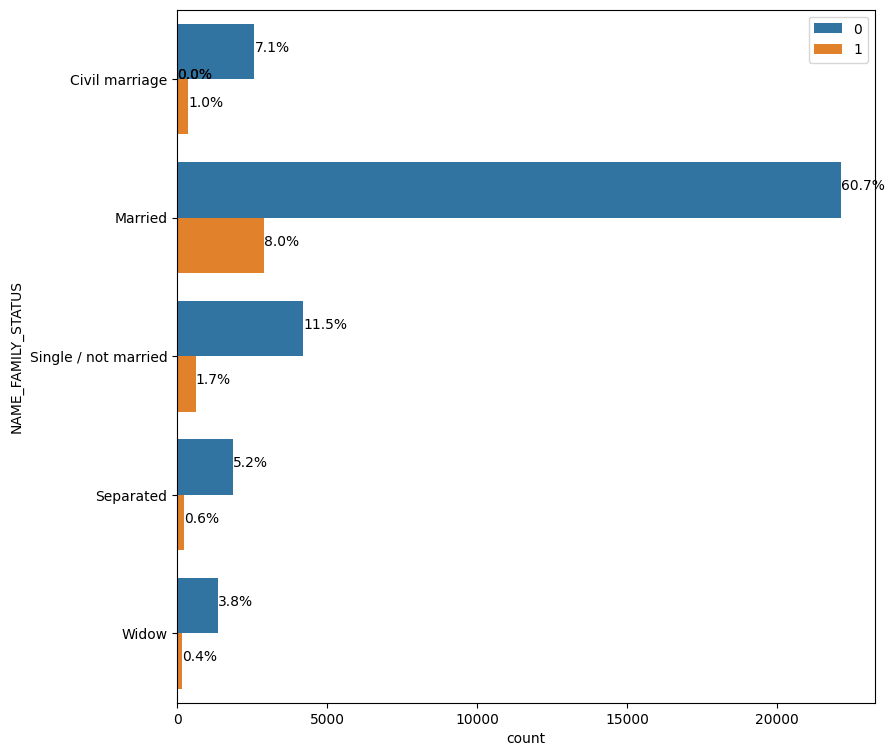

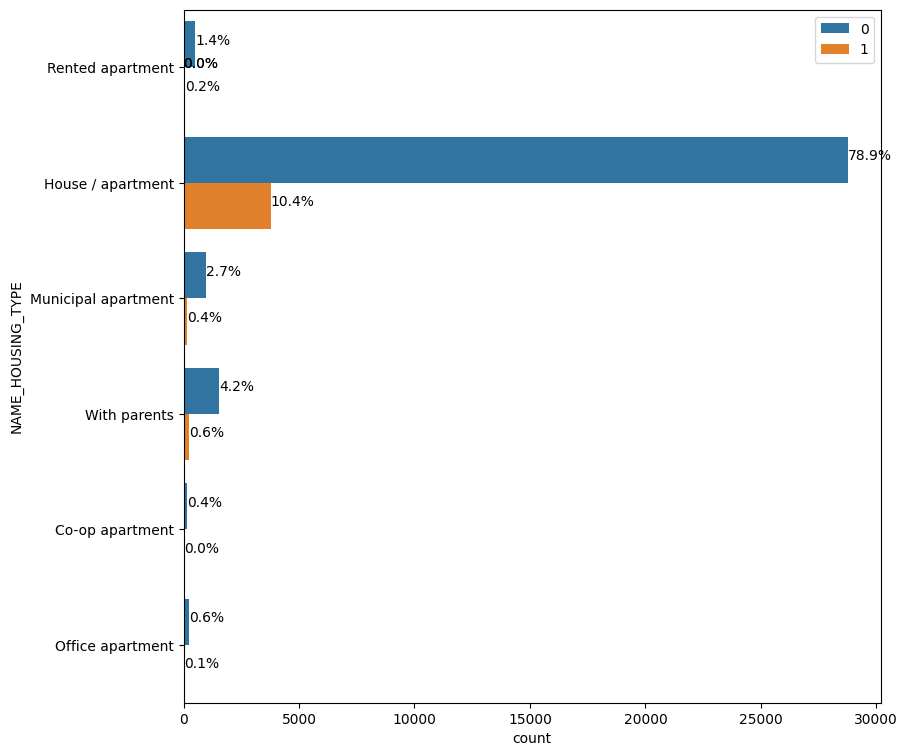

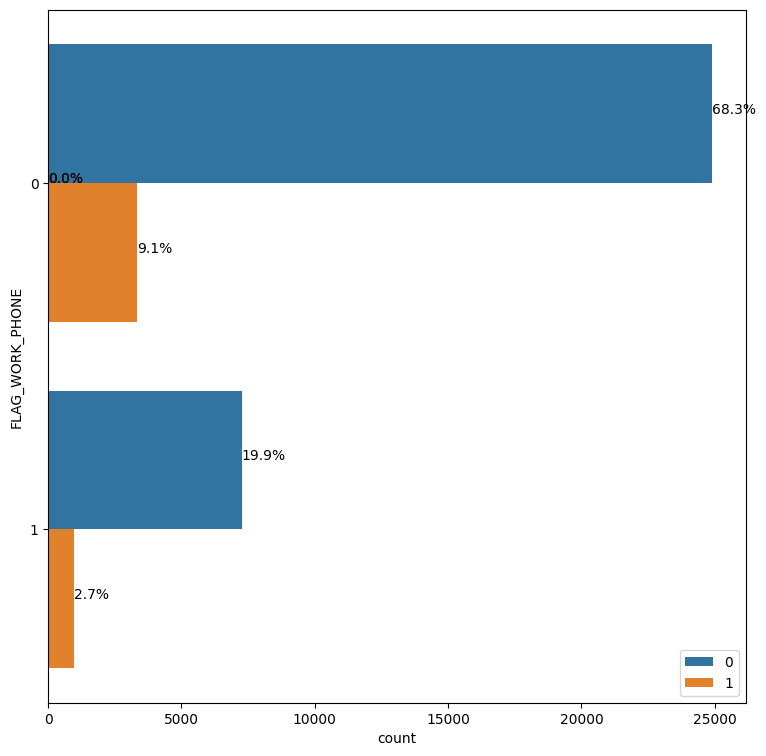

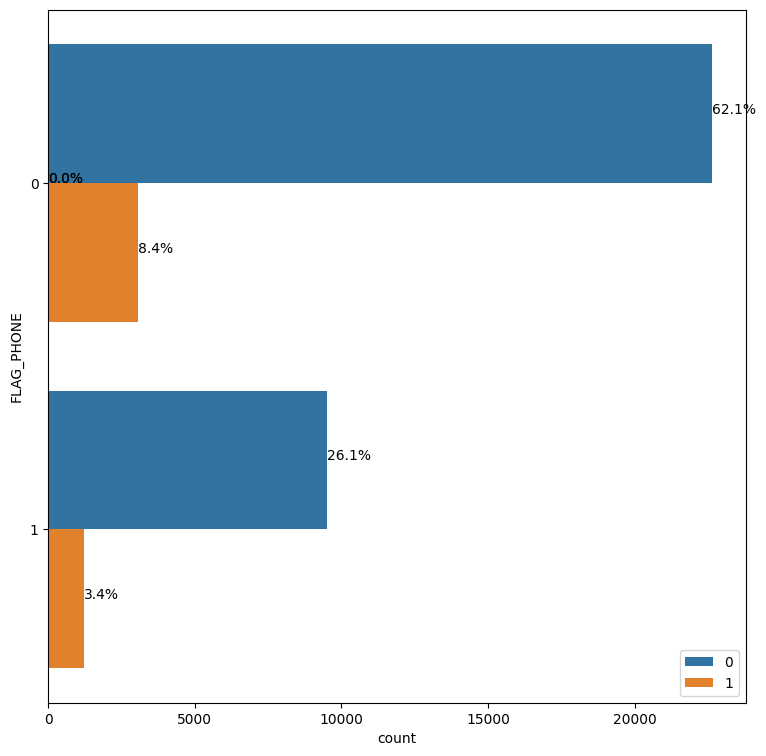

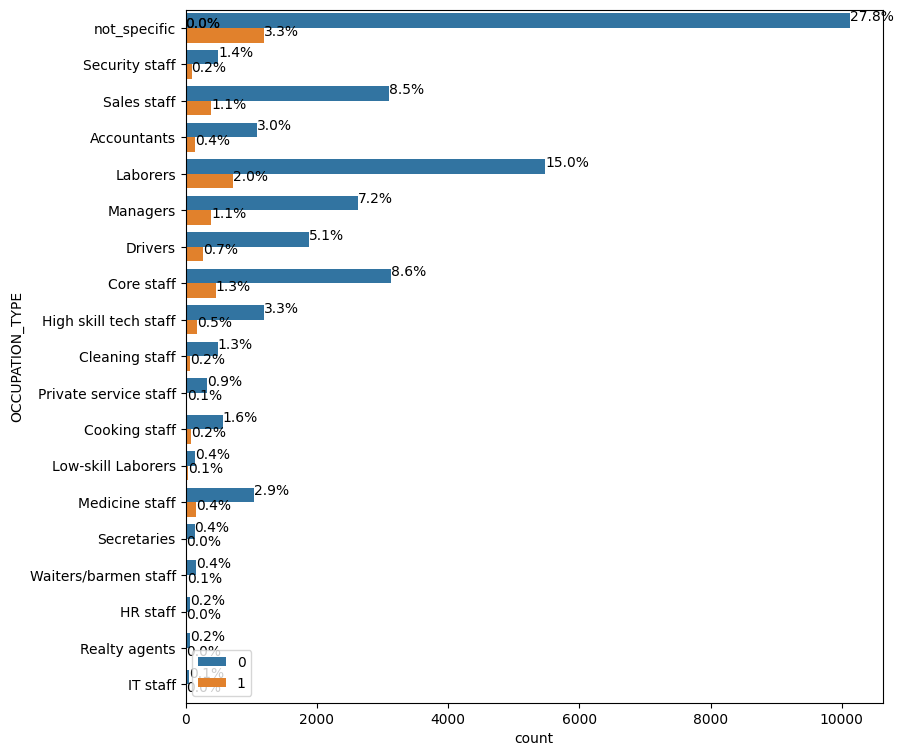

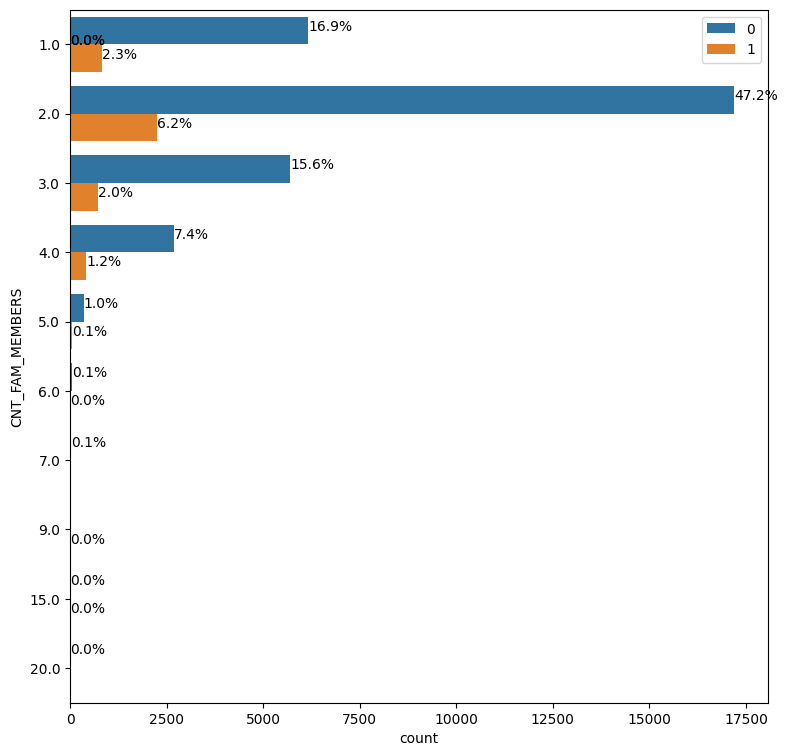

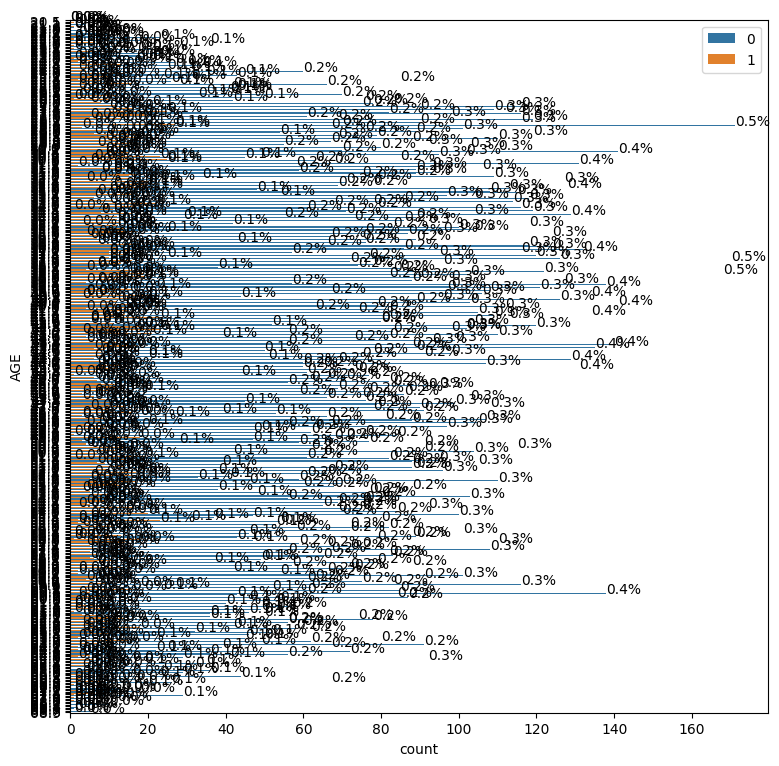

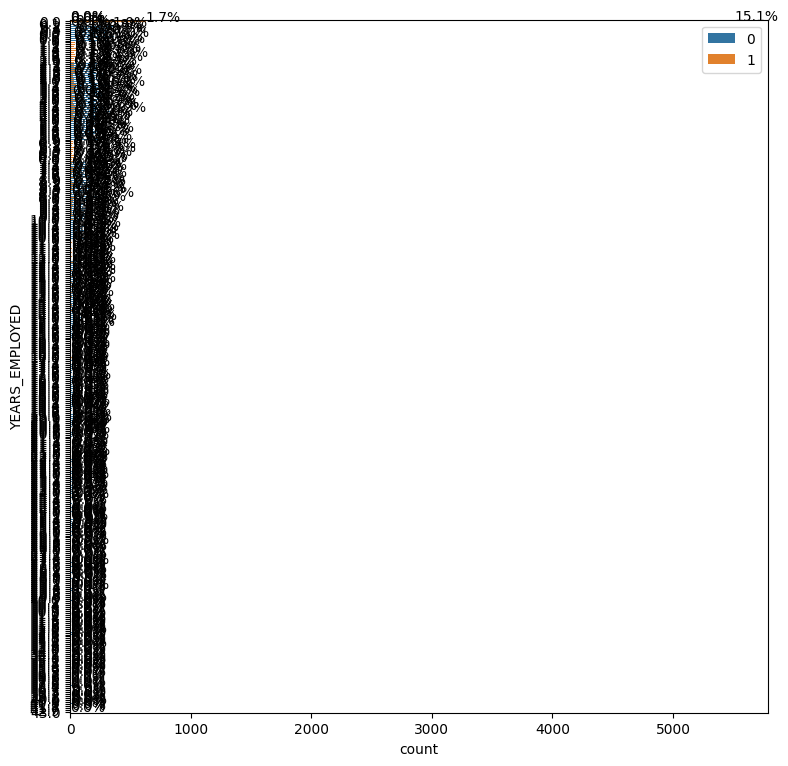

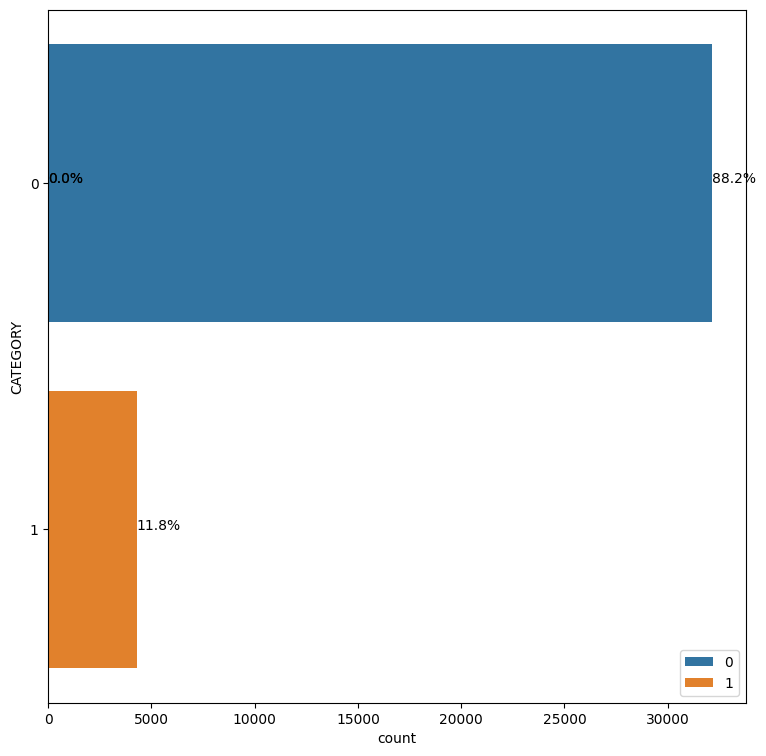

In [52]:
countplot_applicants(df3)

**Observation **
1. kolom FLAG_WORK_PHONE, FLAG PHONE, CATEGORY memiliki dua puncat karena nilai pada kolom tersebut adalah diskrit yaitu 1 dan 0
2. kolom lainya menunjukkan kurva membentuk skew positif, sednagakan untuk kolom AGE  memiliki beberapa puncak

**CATEGORICALDATA**

In [53]:
#melihat data pada pada data data categoricals
for col in categoricals:
    print(f'{col}: {df3[col].unique()}')

FLAG_OWN_CAR: ['Y' 'N']
FLAG_OWN_REALTY: ['Y' 'N']
FLAG_WORK_PHONE: [1 0]
OCCUPATION_TYPE: ['not_specific' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']
NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


Data pada kolom categoricals akan diubah menjadi angka, untuk mempermudah visualisasi dan analsiis

In [54]:
#NAME_INCOME_TYPE
education_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

df3['Education_Level'] = df3['NAME_EDUCATION_TYPE'].map(education_mapping)
df3.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)
df3['Education_Level'].value_counts()

2    24777
4     9864
3     1410
1      374
5       32
Name: Education_Level, dtype: int64

In [55]:
categoricals.append('Education_Level')
categoricals.remove('NAME_EDUCATION_TYPE')

In [56]:
#data categorical yang datanya berisi yes or no
df3['FLAG_OWN_REALTY'] = df3['FLAG_OWN_REALTY'].str.strip().str.upper()
df3['FLAG_OWN_REALTY'] = df3['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
df3['FLAG_OWN_CAR'] = df3['FLAG_OWN_CAR'].str.strip().str.upper()
df3['FLAG_OWN_CAR'] = df3['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

print(df3['FLAG_OWN_REALTY'].value_counts())
print(df3['FLAG_OWN_CAR'].value_counts())

1    24506
0    11951
Name: FLAG_OWN_REALTY, dtype: int64
0    22614
1    13843
Name: FLAG_OWN_CAR, dtype: int64


In [57]:
#income type, family status, housing type, occupation type
income_type_mapping = {
    'Student': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Working': 4,
    'Commercial associate': 5
}

family_status_mapping = {
    'Widow': 1,
    'Separated': 2,
    'Single / not married': 3,
    'Civil marriage': 4,
    'Married': 5
}

housing_type_mapping = {
    'With parents': 1,
    'Rented apartment': 2,
    'Municipal apartment': 3,
    'Co-op apartment': 4,
    'Office apartment': 5,
    'House / apartment': 6
}

occupation_type_mapping = {
    'Low-skill Laborers': 1,
    'Cleaning staff': 2,
    'Cooking staff': 2,
    'Waiters/barmen staff': 2,
    'Security staff': 3,
    'Sales staff': 3,
    'Laborers': 3,
    'Drivers': 3,
    'Medicine staff': 4,
    'Secretaries': 4,
    'HR staff': 4,
    'Accountants': 5,
    'Core staff': 5,
    'Realty agents': 5,
    'Private service staff': 6,
    'High skill tech staff': 6,
    'Managers': 7,
    'IT staff': 7,
    'not_specific' : 8

}

df3['NAME_INCOME_TYPE'] = df3['NAME_INCOME_TYPE'].map(income_type_mapping)
df3['NAME_FAMILY_STATUS'] = df3['NAME_FAMILY_STATUS'].map(family_status_mapping)
df3['NAME_HOUSING_TYPE'] = df3['NAME_HOUSING_TYPE'].map(housing_type_mapping)
df3['OCCUPATION_TYPE'] = df3['OCCUPATION_TYPE'].map(occupation_type_mapping)

In [58]:
#mengecek hasil Mapping
for col in categoricals:
    print(f'{col}: {df3[col].unique()}')

FLAG_OWN_CAR: [1 0]
FLAG_OWN_REALTY: [1 0]
FLAG_WORK_PHONE: [1 0]
OCCUPATION_TYPE: [8 3 5 7 6 2 1 4]
NAME_INCOME_TYPE: [4 5 2 3 1]
NAME_FAMILY_STATUS: [4 5 3 2 1]
NAME_HOUSING_TYPE: [2 6 3 1 4 5]
Education_Level: [4 2 3 1 5]


In [59]:
df3['OCCUPATION_TYPE'].isna().sum()

0

In [60]:
df3['OCCUPATION_TYPE'].value_counts()

3    12426
8    11323
5     4911
7     3072
6     1727
4     1443
2     1380
1      175
Name: OCCUPATION_TYPE, dtype: int64

<ipython-input-61-4d635c29eeff>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=ax, palette=color_palette)
<ipython-input-61-4d635c29eeff>:22: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x=col, data=df3, ax=ax, palette=color_palette)
<ipython-input-61-4d635c29eeff>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=ax, palette=color_palette)
<ipython-input-61-4d635c29eeff>:22: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x=col, data=df3, ax=ax, palette=color_palette)
<ipython-input-61-4d635c29eeff>:22: FutureWarning:

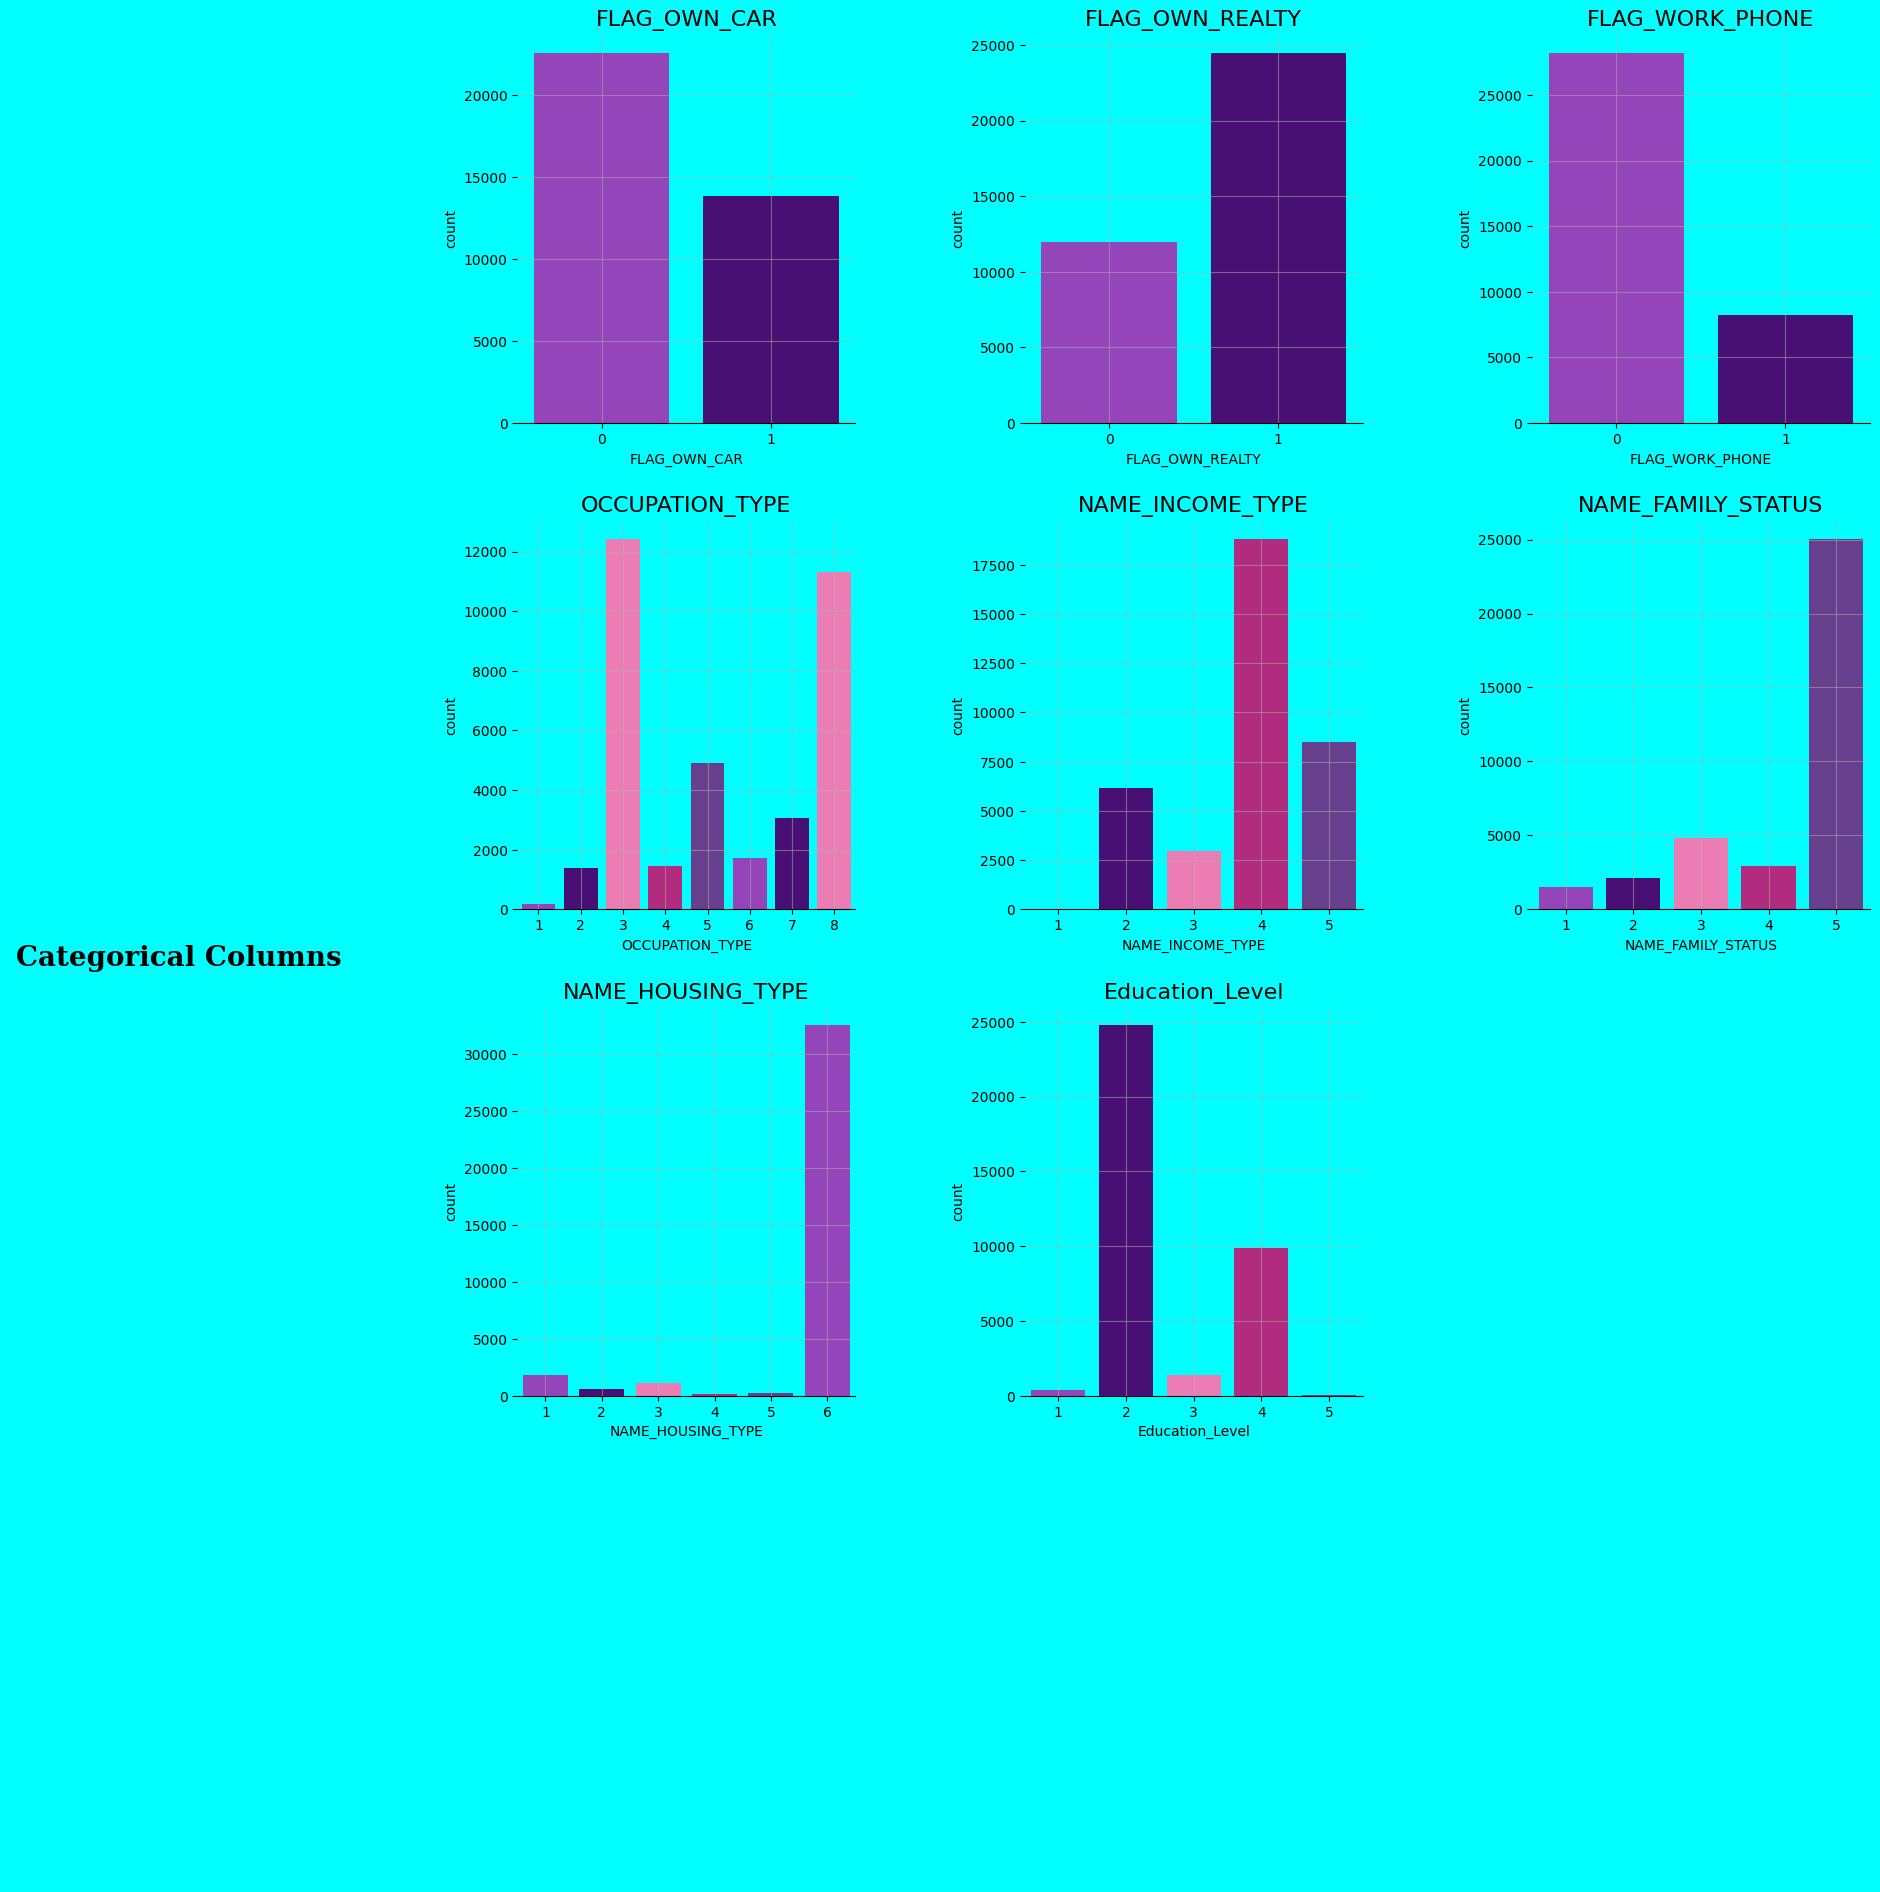

In [61]:
#categoricals Data
fig = plt.figure(figsize=(24,24))
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.5, hspace=0.25)

ax_title = fig.add_subplot(gs[:, 0])
ax_title.text(0.5, 0.5, "Categorical Columns",
              horizontalalignment='center', verticalalignment='center',
              fontsize=20, fontweight='bold', fontfamily='serif', color="#000000")
ax_title.set_xticks([])
ax_title.set_yticks([])
ax_title.set_facecolor(background_color)
ax_title.grid(False)
for spine in ax_title.spines.values():
    spine.set_visible(False)


for i, col in enumerate(categoricals):
    ax = fig.add_subplot(gs[i // 3, (i % 3) + 1])
    sns.countplot(x=col, data=df3, ax=ax, palette=color_palette)
    ax.set_title(col, fontsize=16)
    ax.set_facecolor(background_color)
    ax.grid(alpha=0.5)
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom':
            spine.set_visible(False)

plt.tight_layout()
plt.show()

In [62]:
#Numericals Data
#fig = plt.figure(figsize=(24,24))
#fig.patch.set_facecolor(background_color)

#gs = fig.add_gridspec(4, 4)
#gs.update(wspace=0.5, hspace=0.25)

#ax_title = fig.add_subplot(gs[:, 0])
#ax_title.text(0.5, 0.5, "Numericals Columns",
              #horizontalalignment='center', verticalalignment='center',
              #fontsize=20, fontweight='bold', fontfamily='serif', color="#000000")
#ax_title.set_xticks([])
#ax_title.set_yticks([])
#ax_title.set_facecolor(background_color)
#ax_title.grid(False)
#for spine in ax_title.spines.values():
    ##spine.set_visible(False)


#for i, col in enumerate(numericals):
    #ax = fig.add_subplot(gs[i // 3, (i % 3) + 1])
    #sns.countplot(x=col, data=df3, ax=ax, palette=color_palette)
    #ax.set_title(col, fontsize=16)
    #ax.set_facecolor(background_color)
    #ax.grid(alpha=0.5)
    #for spine in ax.spines.values():
        #if spine.spine_type != 'bottom':
            #spine.set_visible(False)

#plt.tight_layout()
#plt.show()

**Multyvariate Analysis**

In [63]:
df3.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CATEGORY,Education_Level
0,5008804,1,1,0,427500.0,4,4,2,1,0,8,2.0,32.9,12.4,1,4
1,5008805,1,1,0,427500.0,4,4,2,1,0,8,2.0,32.9,12.4,1,4
2,5008806,1,1,0,112500.0,4,5,6,0,0,3,2.0,58.8,3.1,0,2
3,5008808,0,1,0,270000.0,5,3,6,0,1,3,1.0,52.4,8.4,0,2
4,5008809,0,1,0,270000.0,5,3,6,0,1,3,1.0,52.4,8.4,0,2


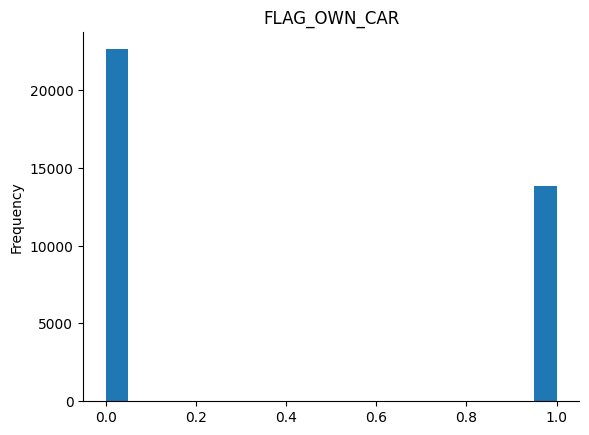

In [64]:
# @title FLAG_OWN_CAR

from matplotlib import pyplot as plt
df3['FLAG_OWN_CAR'].plot(kind='hist', bins=20, title='FLAG_OWN_CAR')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:
#numerical Summary
df3[numericals].describe()

,ID,CNT_CHILDREN,AGE,YEARS_EMPLOYED,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,CATEGORY
count,3.645700e+04,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,43.767916,6.027973,1.866857e+05,0.225526,0.294813,2.198453,0.117700
std,4.187524e+04,0.742367,11.508464,6.484278,1.017892e+05,0.417934,0.455965,0.911686,0.322257
min,5.008804e+06,0.000000,20.500000,0.000000,2.700000e+04,0.000000,0.000000,1.000000,0.000000
25%,5.042028e+06,0.000000,34.100000,1.100000,1.215000e+05,0.000000,0.000000,2.000000,0.000000
50%,5.074614e+06,0.000000,42.600000,4.300000,1.575000e+05,0.000000,0.000000,2.000000,0.000000
75%,5.115396e+06,1.000000,53.300000,8.600000,2.250000e+05,0.000000,1.000000,3.000000,0.000000
max,5.150487e+06,19.000000,68.900000,43.000000,1.575000e+06,1.000000,1.000000,20.000000,1.000000


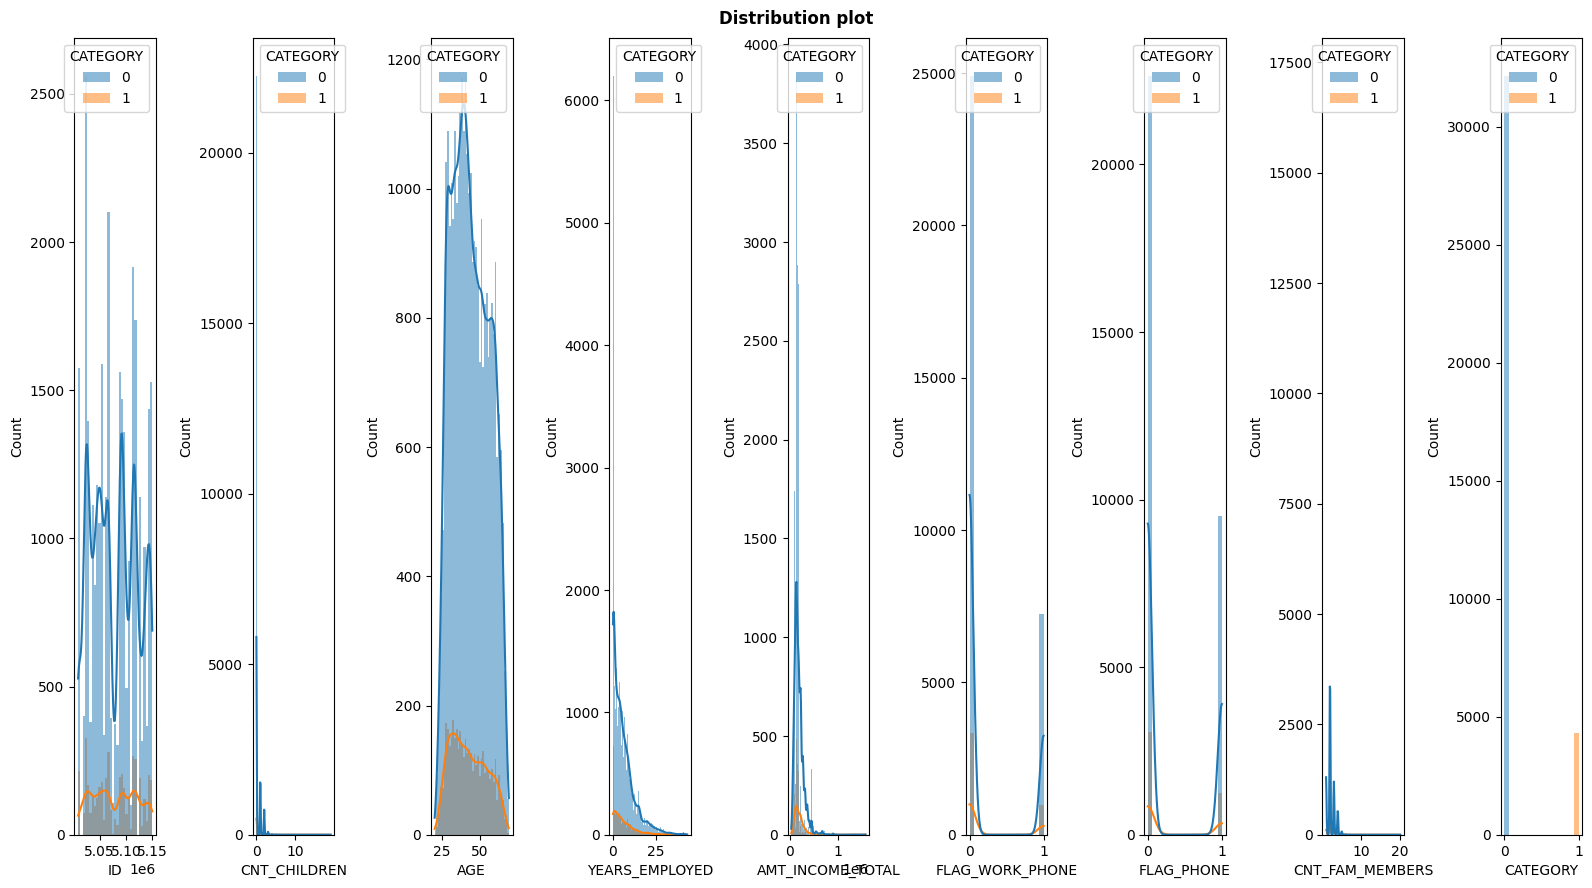

In [66]:
#hubungan data numericals dengan Category
fig, axarr = plt.subplots(1,9, figsize=(16, 9))
for x in df3[numericals].columns:
    sns.histplot(data=df3 , x = df3[numericals][x],color='skyblue', kde=True, edgecolor='none', ax=axarr[df3[numericals].columns.get_loc(x)], hue='CATEGORY')
plt.suptitle("Distribution plot", weight='bold')
fig.tight_layout(pad=1)

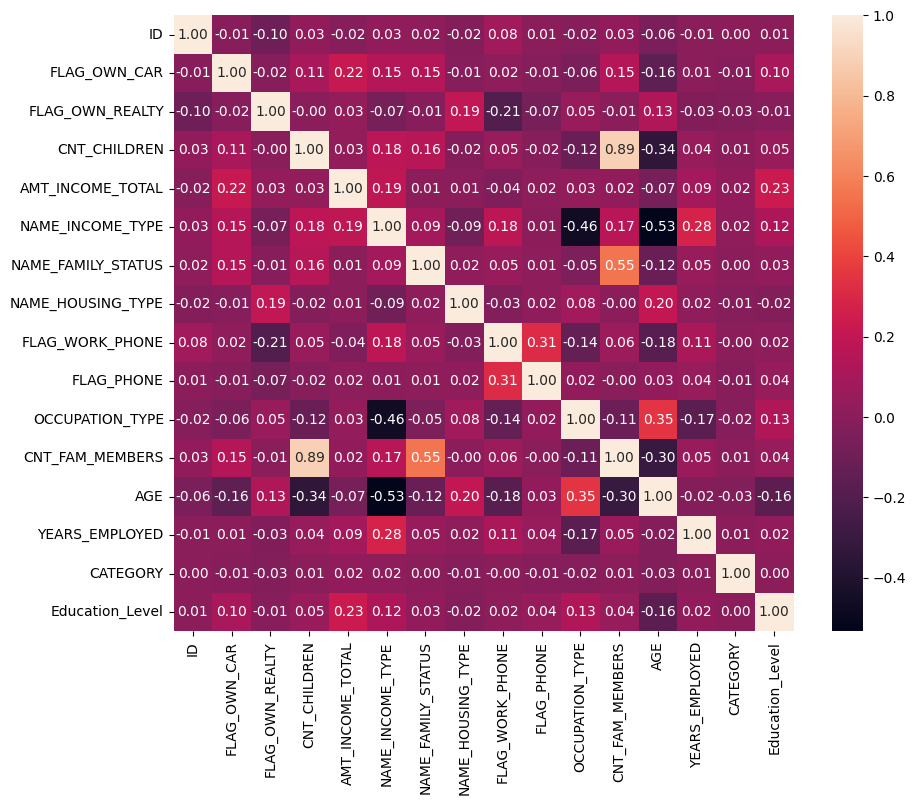

In [67]:
#korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df3.corr(),annot=True, fmt='.2f')
plt.show()

observation
1. Umumnya tidak terdapat korelasi yang cukup signifikan antara features pada data
2. Korelasi yang paling tinggi terhadap beresiko atau tidaknya penerimaan approval credit card adalah kolom Age dan Flag_own_realty
3. Count of family members memiliki hubungan yang erat dengan count children, namun memberikan korelasi yang sama terhadapt kolom kategory


In [68]:
# pairplot of the data
#sns.pairplot(df3, hue='CATEGORY')

Text(0, 0.5, 'AMT_INCOME_TOTAL')

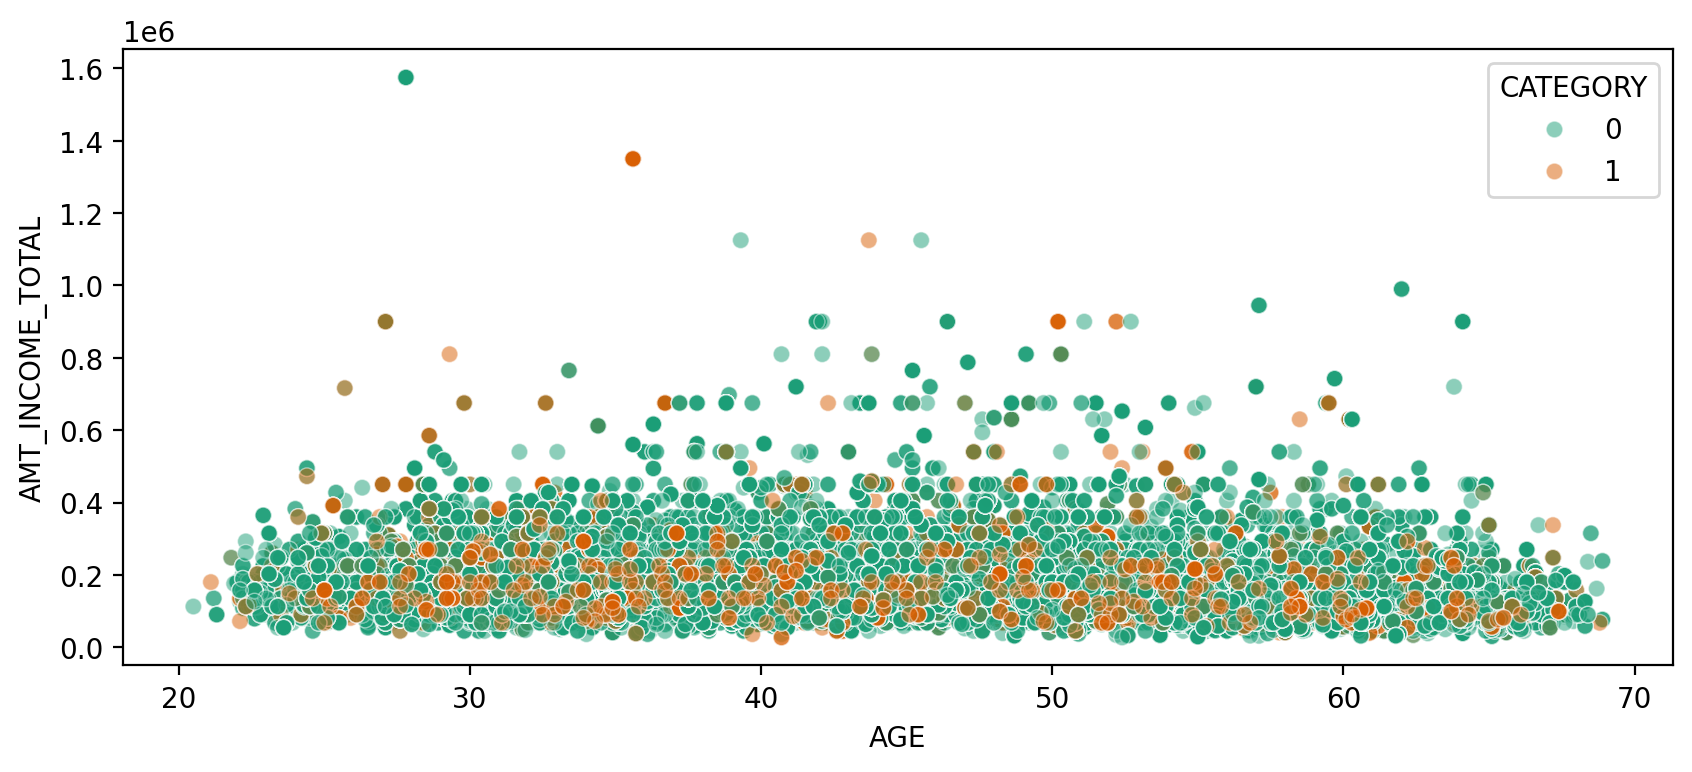

In [69]:
#hubungan antara umur dan count income
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df3,y='AMT_INCOME_TOTAL',x='AGE',hue='CATEGORY', linewidth=0.5,alpha=0.5,palette='Dark2')

plt.xlabel('AGE')
plt.ylabel('AMT_INCOME_TOTAL')

Observation
1. Dari visualsiasi diatas dapat dilihat bahwa umur belum tidak terlalu mempengaruhi kategory, namun jumlah pendapatan tahun mempengaruhi, dimana semakin kecil pendapatan tahunan maka semakin beresiko

**DEEP DIVE QUESTION**

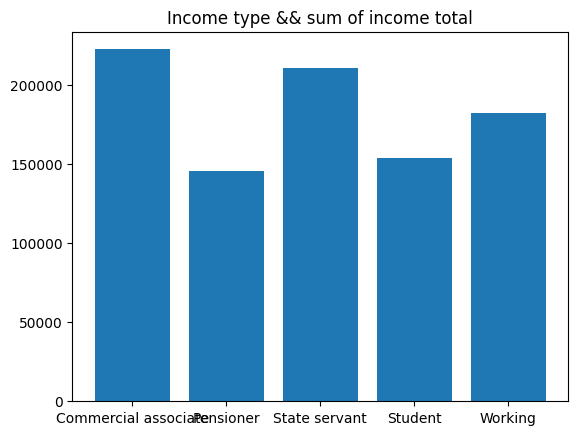

In [70]:
# pd.pivot_table(application,index='NAME_INCOME_TYPE', values ='AMT_INCOME_TOTAL')
x=['Commercial associate','Pensioner','State servant','Student','Working']
y=[222334,145276,210195,153692,182320]
plt.bar(x,y)
plt.title('Income type && sum of income total')
plt.show()

#PEMODELAN

In [71]:
#FEATURE AND TARGET
data = ['ID','FLAG_OWN_CAR',	'FLAG_OWN_REALTY',	'CNT_CHILDREN',	'AMT_INCOME_TOTAL',	'NAME_INCOME_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE',	'FLAG_WORK_PHONE',	'FLAG_PHONE',	'OCCUPATION_TYPE',	'CNT_FAM_MEMBERS',	'AGE',	'YEARS_EMPLOYED',	'Education_Level']
x = df3.drop(columns=['CATEGORY'])
y = df3['CATEGORY']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,stratify=y,random_state=0)

**Scalling**

In [73]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_std = scaler.transform(x)

In [75]:
df3.head(5)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CATEGORY,Education_Level
0,5008804,1,1,0,427500.0,4,4,2,1,0,8,2.0,32.9,12.4,1,4
1,5008805,1,1,0,427500.0,4,4,2,1,0,8,2.0,32.9,12.4,1,4
2,5008806,1,1,0,112500.0,4,5,6,0,0,3,2.0,58.8,3.1,0,2
3,5008808,0,1,0,270000.0,5,3,6,0,1,3,1.0,52.4,8.4,0,2
4,5008809,0,1,0,270000.0,5,3,6,0,1,3,1.0,52.4,8.4,0,2


In [76]:
X = df3.drop('CATEGORY', axis=1)
y = df3['CATEGORY']


In [77]:
X_train, X_test,Y_train,Y_test = train_test_split(X_std,y,
                                                test_size = 0.25,
                                                random_state = 0)

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

**Random Forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [80]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [81]:
rf.score(X_train,Y_train),rf.score(X_test,Y_test)

(0.9997074098456586, 0.8727372462973121)

In [95]:
Y_pred = rf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[7594  490]
 [ 670  361]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8084
           1       0.42      0.35      0.38      1031

    accuracy                           0.87      9115
   macro avg       0.67      0.64      0.66      9115
weighted avg       0.86      0.87      0.87      9115



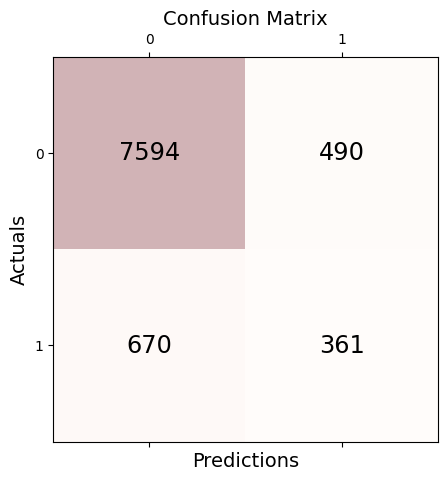

Accuracy: 81.20%
Precision: 12.34%
Recall: 9.79%
Specificity: 93.94%
F1: 10.91%


In [96]:
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

print('Accuracy:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
print('Precision:', '{:.2%}'.format(precision_score(y_test, y_pred)))
print('Recall:', '{:.2%}'.format(recall_score(y_test, y_pred)))
print('Specificity:', '{:.2%}'.format((conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])))
print('F1:', '{:.2%}'.format(f1_score(y_test, y_pred)))

**Decision Tree**

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [84]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [85]:
dt.score(X_train,Y_train),dt.score(X_test,Y_test)

(1.0, 0.8608886450905101)

In [86]:
Y_pred = dt.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[7451  633]
 [ 635  396]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8084
           1       0.38      0.38      0.38      1031

    accuracy                           0.86      9115
   macro avg       0.65      0.65      0.65      9115
weighted avg       0.86      0.86      0.86      9115



**Logistic regresion**

In [87]:
lr = LogisticRegression(random_state=0)

In [88]:
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [89]:
lr.score(X_train,Y_train)

0.8807695121059176

In [90]:
lr.score(X_test,Y_test)

0.8868897421832145

In [91]:
from sklearn.metrics import confusion_matrix,classification_report

In [92]:
y_pred = lr.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[7451  633]
 [ 635  396]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8084
           1       0.38      0.38      0.38      1031

    accuracy                           0.86      9115
   macro avg       0.65      0.65      0.65      9115
weighted avg       0.86      0.86      0.86      9115



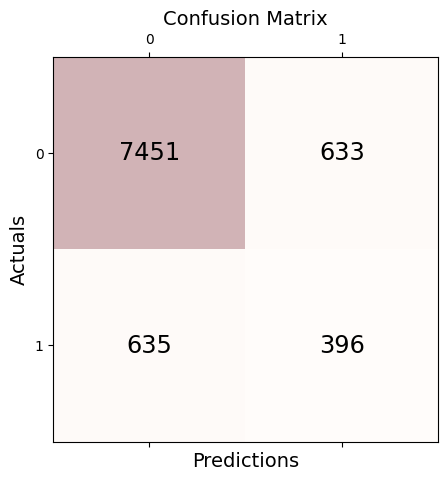

Accuracy: 88.23%
Precision: 0.00%
Recall: 0.00%
Specificity: 92.17%
F1: 0.00%


In [93]:
y_pred = lr.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

print('Accuracy:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
print('Precision:', '{:.2%}'.format(precision_score(y_test, y_pred)))
print('Recall:', '{:.2%}'.format(recall_score(y_test, y_pred)))
print('Specificity:', '{:.2%}'.format((conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])))
print('F1:', '{:.2%}'.format(f1_score(y_test, y_pred)))